In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt 

In [2]:
track = pd.read_csv(r'C:\Users\User\Downloads\20181120_track_features\track_features\tf_000000000001.csv')
session = pd.read_csv(r'E:\logdata\test_set\log_prehistory_20180715_000000000000.csv')
session.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

In [3]:
track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8,364.906677,1979,90.965232,0.851046,0.363622,0.300117,0.465182,5.150449,0.127037,...,4,0.211844,0.042945,-0.433785,0.115645,0.456437,0.400481,-0.259629,-0.002503,-0.757088
1,t_65d18266-940a-4f27-9df5-fc9fee10b406,106.160004,1987,96.794376,0.250302,0.440026,0.414878,0.563041,6.605741,0.529062,...,4,0.736954,-0.069781,-0.360500,0.170185,0.475511,0.501377,-0.199189,0.063746,-0.648822
2,t_59ef344c-10bc-415e-8a80-f97b46ee8bc8,275.906677,1985,98.495282,0.376435,0.659612,0.650850,0.696868,9.034748,0.378950,...,4,0.703813,0.137408,-0.325600,0.162500,0.209357,0.556263,-0.047349,-0.201937,-0.722556
3,t_ba702bde-7de3-418f-95f6-5c1af618e28c,314.626678,1960,92.442730,0.710315,0.553800,0.617168,0.601151,9.409214,0.413531,...,4,0.723693,0.461877,-1.031251,0.133070,0.653448,0.139172,-0.265598,-0.257693,-0.093790
4,t_96e1843d-312b-476d-9e31-ebb14bc478ff,323.133331,1990,96.715096,0.001014,0.318370,0.283095,0.331088,5.358051,0.759440,...,4,0.418748,0.280588,0.362112,-0.345611,-0.461005,0.587766,0.128220,-0.172042,0.341655


In [4]:
session.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00001e52-55c0-470c-8d32-85c691c2019a,1,16,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,True,True,False,0,0,...,0,1,0,False,21,2018-07-14,False,catalog,appload,endplay
1,0_00001e52-55c0-470c-8d32-85c691c2019a,2,16,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,False,False,True,False,1,1,...,0,0,0,False,21,2018-07-14,False,user_collection,clickrow,endplay
2,0_00001e52-55c0-470c-8d32-85c691c2019a,3,16,t_977b3ee2-e7a8-4357-b164-f663446c1a25,False,False,False,True,0,0,...,1,0,1,False,21,2018-07-14,False,user_collection,clickrow,trackdone
3,0_00001e52-55c0-470c-8d32-85c691c2019a,4,16,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,False,True,True,False,0,0,...,1,0,0,False,21,2018-07-14,False,user_collection,trackdone,fwdbtn
4,0_00001e52-55c0-470c-8d32-85c691c2019a,5,16,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,True,True,True,False,0,1,...,0,0,0,False,21,2018-07-14,False,user_collection,fwdbtn,fwdbtn


In [5]:
track = track.drop_duplicates(keep='first')
session = session.drop_duplicates(keep='first')

In [6]:
track.describe

<bound method NDFrame.describe of                                        track_id    duration  release_year  \
0        t_8e88a9ea-1451-44ff-8fae-8bbad75b55c8  364.906677          1979   
1        t_65d18266-940a-4f27-9df5-fc9fee10b406  106.160004          1987   
2        t_59ef344c-10bc-415e-8a80-f97b46ee8bc8  275.906677          1985   
3        t_ba702bde-7de3-418f-95f6-5c1af618e28c  314.626678          1960   
4        t_96e1843d-312b-476d-9e31-ebb14bc478ff  323.133331          1990   
...                                         ...         ...           ...   
1853072  t_8ca1c0cb-7140-482d-a51e-20c2d04dd826  269.857971          2018   
1853073  t_0190990f-99f3-41a8-830f-6d1f09ea603d  398.811432          2018   
1853074  t_9cf9f46e-2efd-4355-af00-2dfdcaf5b2a0  233.919464          2018   
1853075  t_7eed5c40-e59e-42b1-abff-81415c8c80f7  153.484344          2018   
1853076  t_012fae69-a6e6-4018-91f3-51db8779982a  157.706665          2018   

         us_popularity_estimate  acoustic

In [7]:
session.describe

<bound method NDFrame.describe of                                      session_id  session_position  \
0        0_00001e52-55c0-470c-8d32-85c691c2019a                 1   
1        0_00001e52-55c0-470c-8d32-85c691c2019a                 2   
2        0_00001e52-55c0-470c-8d32-85c691c2019a                 3   
3        0_00001e52-55c0-470c-8d32-85c691c2019a                 4   
4        0_00001e52-55c0-470c-8d32-85c691c2019a                 5   
...                                         ...               ...   
3673815  0_fffff7ac-faea-4a39-aa66-770be5429a33                 3   
3673816  0_fffff7ac-faea-4a39-aa66-770be5429a33                 4   
3673817  0_fffff7ac-faea-4a39-aa66-770be5429a33                 5   
3673818  0_fffff7ac-faea-4a39-aa66-770be5429a33                 6   
3673819  0_fffff7ac-faea-4a39-aa66-770be5429a33                 7   

         session_length                                track_id  skip_1  \
0                    16  t_a0b2a533-caad-4a72-af14-e647bd7e9c1

In [8]:
track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [9]:
session.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [10]:
session = session.dropna()

In [11]:
track = track.dropna()

In [12]:
track.shape

(1853077, 30)

In [13]:
session.shape

(3673820, 21)

In [14]:
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853077 entries, 0 to 1853076
Data columns (total 30 columns):
track_id                  object
duration                  float64
release_year              int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                       int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                      object
organism                  float64
speechiness               float64
tempo                     float64
time_signature            int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_ve

In [15]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673820 entries, 0 to 3673819
Data columns (total 21 columns):
session_id                         object
session_position                   int64
session_length                     int64
track_id                           object
skip_1                             bool
skip_2                             bool
skip_3                             bool
not_skipped                        bool
context_switch                     int64
no_pause_before_play               int64
short_pause_before_play            int64
long_pause_before_play             int64
hist_user_behavior_n_seekfwd       int64
hist_user_behavior_n_seekback      int64
hist_user_behavior_is_shuffle      bool
hour_of_day                        int64
date                               object
premium                            bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtypes: bool(6), int64(9),

In [16]:
most_heard_tracks = track.sort_values(by ='us_popularity_estimate', ascending=False)
most_heard_tracks['track_id']

1381288    t_c7703c28-9da6-41f3-89b7-1a86ff1ee6be
567882     t_1a73002a-d065-4a33-b98a-a3b0443310be
366576     t_8cf71d62-30fe-4bab-854b-812e54a0b6aa
925029     t_16bc2816-8daf-449a-a0f7-93ee884ffdda
1712034    t_a633d9e8-1342-4dbf-83de-86e87901efe0
                            ...                  
14216      t_ef4702dc-2561-4cac-8f8c-73c766905355
818865     t_f9966086-dbec-4006-b4e8-1bb4a520ee8e
1578227    t_b9518410-6939-416a-b186-5756ed65e9fa
83701      t_b38e24c9-8395-4417-867b-c5d5d5076a47
1365983    t_18082711-2551-451f-b384-c82c01f7f43a
Name: track_id, Length: 1853077, dtype: object

In [18]:
tracks_per_session = session.groupby('session_id')['track_id'].count().reset_index(name="count")

In [19]:
tracks_per_session

,session_id,count
0,0_00001e52-55c0-470c-8d32-85c691c2019a,8
1,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,10
2,0_00006c31-e480-4e08-89d8-0d2ca3a09756,5
3,0_00008569-3aa9-4363-acfd-f141a4a86c88,10
4,0_000091ac-2abb-4a2f-ab17-3b93cb0f37ed,8
...,...,...
444486,0_ffff3e31-b986-4d87-9754-86919a7ae997,10
444487,0_ffff6795-9f9c-43c4-adf8-e08776050548,10
444488,0_ffff7283-6b14-48a1-83b6-e1edd21e5e78,10
444489,0_ffffac7f-b319-4187-97ba-612740ad3ae1,10


In [42]:
tracks_per_session['count'].unique()

array([ 8, 10,  5,  6,  7,  9], dtype=int64)

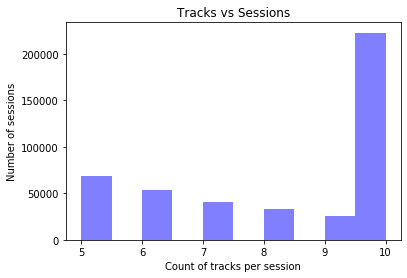

In [43]:
plt.hist(tracks_per_session['count'], bins = 10, facecolor='blue', alpha=0.5)
plt.xlabel("Count of tracks per session")
plt.ylabel("Number of sessions")
plt.title("Tracks vs Sessions")
plt.show()

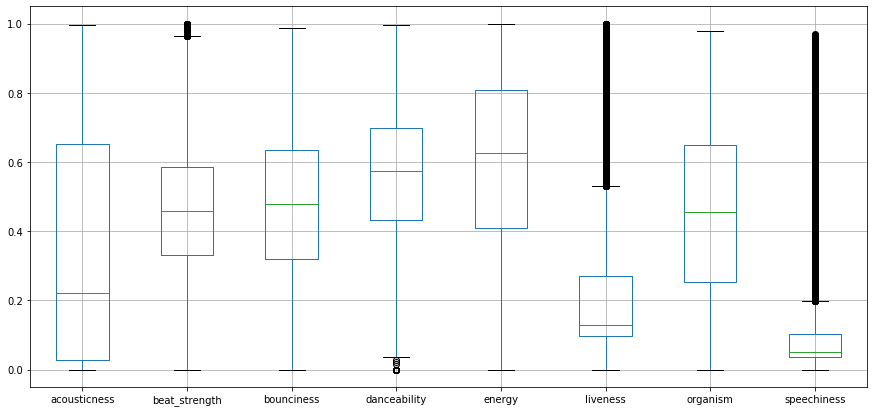

In [21]:
plt.figure(figsize = (15, 7))
track.boxplot(column = ['acousticness', 'beat_strength', 'bounciness', 'danceability',
                      'energy', 'liveness', 'organism', 'speechiness'])
plt.show()

In [22]:
temp = session.drop_duplicates(subset = 'session_id', keep='first')
temp

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00001e52-55c0-470c-8d32-85c691c2019a,1,16,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,True,True,False,0,0,...,0,1,0,False,21,2018-07-14,False,catalog,appload,endplay
8,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,1,20,t_312b3509-48c1-4928-a6e5-d3e7a51c216b,True,True,True,False,0,0,...,0,0,0,True,14,2018-07-15,True,editorial_playlist,fwdbtn,endplay
18,0_00006c31-e480-4e08-89d8-0d2ca3a09756,1,10,t_a527f00e-9ccb-4dae-990b-e5947b6e94ef,False,False,True,False,0,0,...,0,1,0,True,1,2018-07-15,False,catalog,trackdone,endplay
23,0_00008569-3aa9-4363-acfd-f141a4a86c88,1,20,t_e2096c12-2f46-4568-a722-74b04443b8ca,True,True,True,False,0,0,...,0,0,0,True,15,2018-07-15,True,user_collection,fwdbtn,fwdbtn
33,0_000091ac-2abb-4a2f-ab17-3b93cb0f37ed,1,17,t_76347c5e-06dd-439e-99e0-1abeaf6d6730,False,False,True,False,0,0,...,0,0,1,False,6,2018-07-15,True,catalog,clickrow,endplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673773,0_ffff3e31-b986-4d87-9754-86919a7ae997,1,20,t_4500b098-1559-4415-89ec-0377b0717dfe,False,False,False,True,0,0,...,0,0,2,False,16,2018-07-15,True,user_collection,trackdone,trackdone
3673783,0_ffff6795-9f9c-43c4-adf8-e08776050548,1,20,t_e2189566-ac64-40a2-9e20-7c49bd7593e0,False,False,True,False,0,0,...,0,0,0,False,10,2018-07-15,False,catalog,clickrow,endplay
3673793,0_ffff7283-6b14-48a1-83b6-e1edd21e5e78,1,20,t_da898dc5-c288-4722-99f2-53322e61fb81,True,True,True,False,0,0,...,0,0,0,True,14,2018-07-15,True,catalog,playbtn,fwdbtn
3673803,0_ffffac7f-b319-4187-97ba-612740ad3ae1,1,20,t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,True,True,True,False,0,0,...,0,0,0,False,17,2018-07-15,True,editorial_playlist,clickrow,endplay


In [24]:
track.corr()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
duration,1.000000,-0.045130,-0.015838,-0.044906,-0.064019,-0.067638,-0.093255,-0.058183,0.003577,0.022480,...,0.022053,-0.158896,0.092877,-0.067388,-0.003715,-0.035438,-0.096422,0.065613,0.035416,0.072712
release_year,-0.045130,1.000000,0.010107,-0.115725,0.015627,0.025406,0.085863,0.036063,0.100816,0.056164,...,0.015316,-0.116834,-0.177868,0.322156,0.078672,-0.201624,-0.305497,0.239773,0.002899,0.309333
us_popularity_estimate,-0.015838,0.010107,1.000000,-0.026938,-0.010261,-0.015268,0.015244,-0.022100,0.017608,0.012442,...,0.005871,-0.026242,-0.022021,0.079340,0.050668,-0.088968,-0.034165,0.079415,-0.061319,0.011203
acousticness,-0.044906,-0.115725,-0.026938,1.000000,-0.110050,-0.063869,-0.228100,-0.041730,-0.707397,0.342601,...,-0.168968,-0.171668,0.386850,-0.620806,-0.202431,0.416409,0.013962,-0.529983,0.203731,-0.449608
beat_strength,-0.064019,0.015627,-0.010261,-0.110050,1.000000,0.967263,0.874314,0.885515,0.070430,0.169400,...,0.121649,0.529549,-0.502370,0.094997,0.510801,0.295005,-0.123622,0.034039,0.063381,0.081215
bounciness,-0.067638,0.025406,-0.015268,-0.063869,0.967263,1.000000,0.862900,0.955050,0.034781,0.167109,...,0.097585,0.517160,-0.525849,0.075748,0.515283,0.338114,-0.135509,-0.012813,0.059376,0.074136
danceability,-0.093255,0.085863,0.015244,-0.228100,0.874314,0.862900,1.000000,0.780775,0.191068,0.116382,...,0.161847,0.518964,-0.567904,0.272122,0.584909,0.165592,-0.112482,0.183982,0.038148,0.103242
dyn_range_mean,-0.058183,0.036063,-0.022100,-0.041730,0.885515,0.955050,0.780775,1.000000,0.001988,0.140030,...,0.066647,0.445540,-0.480129,0.054968,0.441644,0.317959,-0.158947,-0.046474,0.046972,0.094521
energy,0.003577,0.100816,0.017608,-0.707397,0.070430,0.034781,0.191068,0.001988,1.000000,-0.606772,...,0.165151,0.329040,-0.375618,0.616108,0.192414,-0.321771,0.114035,0.461830,-0.070040,0.380985
flatness,0.022480,0.056164,0.012442,0.342601,0.169400,0.167109,0.116382,0.140030,-0.606772,1.000000,...,-0.001071,-0.136306,0.048428,-0.255259,0.202095,0.219726,-0.157158,-0.082132,0.133719,-0.190872


In [25]:
session.corr()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium
session_position,1.000000,0.328377,0.123570,0.104140,0.047158,-0.038773,-0.018695,0.341031,0.054363,0.049722,-0.066789,-0.045669,0.006249,-0.006870,0.026966
session_length,0.328377,1.000000,0.065387,0.050650,0.029151,-0.026761,-0.010930,0.079779,-0.001278,-0.010065,-0.012340,-0.016485,0.007936,-0.021940,0.081381
skip_1,0.123570,0.065387,1.000000,0.812940,0.600197,-0.574014,-0.091194,0.211108,-0.126420,-0.157381,-0.053316,-0.069899,0.061850,0.010787,-0.024357
skip_2,0.104140,0.050650,0.812940,1.000000,0.738263,-0.706096,-0.070070,0.128539,-0.027809,-0.065076,0.008013,-0.051670,0.058778,0.010494,-0.017142
skip_3,0.047158,0.029151,0.600197,0.738263,1.000000,-0.956376,-0.043994,-0.047995,0.120614,0.085016,0.065415,-0.029499,0.042182,0.015689,-0.006059
not_skipped,-0.038773,-0.026761,-0.574014,-0.706096,-0.956376,1.000000,0.036532,0.064362,-0.129186,-0.095590,-0.072504,0.027453,-0.039278,-0.016266,0.004832
context_switch,-0.018695,-0.010930,-0.091194,-0.070070,-0.043994,0.036532,1.000000,0.034899,0.007119,0.029065,0.014858,0.011906,-0.034469,0.000799,0.026885
no_pause_before_play,0.341031,0.079779,0.211108,0.128539,-0.047995,0.064362,0.034899,1.000000,-0.636822,-0.703031,-0.089177,-0.079474,-0.012410,-0.007267,0.006095
short_pause_before_play,0.054363,-0.001278,-0.126420,-0.027809,0.120614,-0.129186,0.007119,-0.636822,1.000000,0.905823,-0.004981,0.026806,0.026779,0.006937,0.033576
long_pause_before_play,0.049722,-0.010065,-0.157381,-0.065076,0.085016,-0.095590,0.029065,-0.703031,0.905823,1.000000,-0.000448,0.038685,0.017645,0.007521,-0.000379


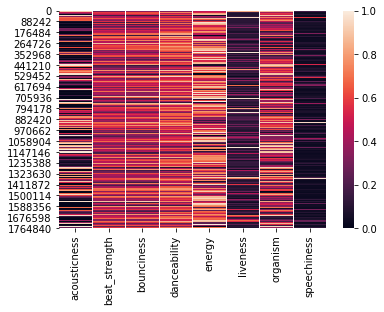

In [26]:
df = track[['acousticness', 'beat_strength', 'bounciness', 'danceability',
                      'energy', 'liveness', 'organism', 'speechiness']]
sns.heatmap(df)

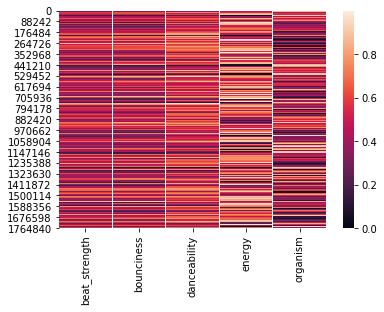

In [27]:
df = track[['beat_strength', 'bounciness', 'danceability',
                      'energy', 'organism']]
sns.heatmap(df)

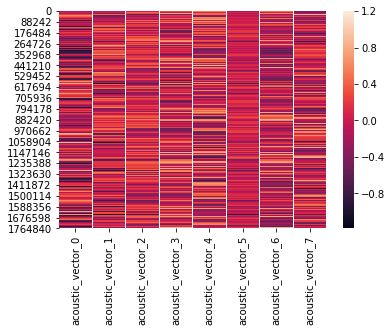

In [28]:
df = track[['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3',
            'acoustic_vector_4','acoustic_vector_5','acoustic_vector_6', 'acoustic_vector_7']]
sns.heatmap(df)

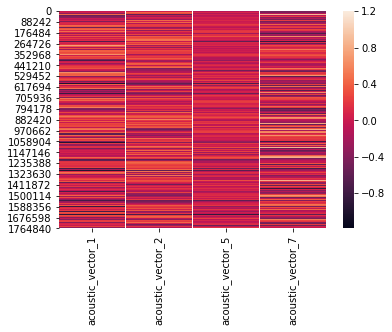

In [29]:
df = track[['acoustic_vector_1','acoustic_vector_2','acoustic_vector_5', 'acoustic_vector_7']]
sns.heatmap(df)

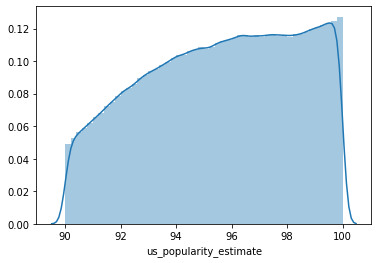

In [30]:
sns.distplot(track['us_popularity_estimate'])

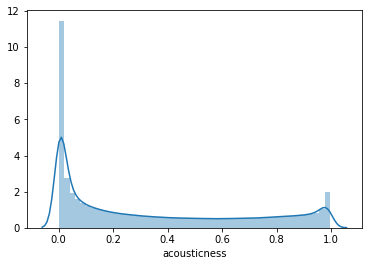

In [31]:
sns.distplot(track['acousticness'])

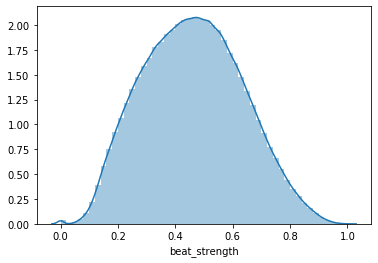

In [32]:
sns.distplot(track['beat_strength'])

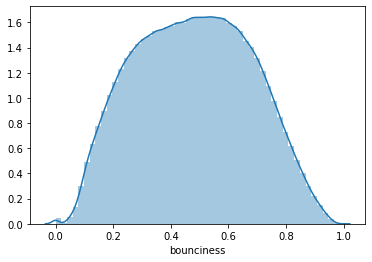

In [33]:
sns.distplot(track['bounciness'])

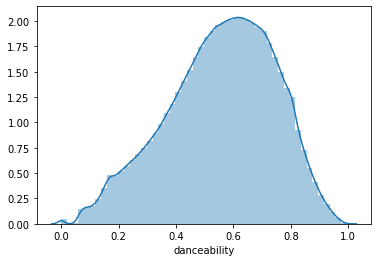

In [34]:
sns.distplot(track['danceability'])

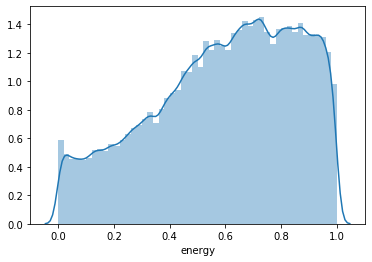

In [35]:
sns.distplot(track['energy'])

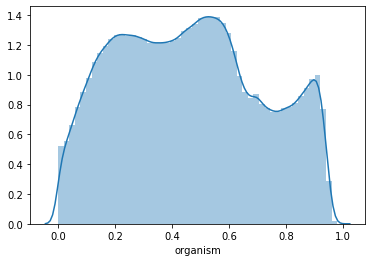

In [36]:
sns.distplot(track['organism'])

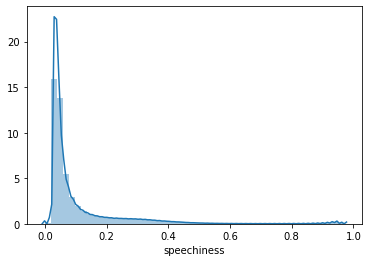

In [37]:
sns.distplot(track['speechiness'])

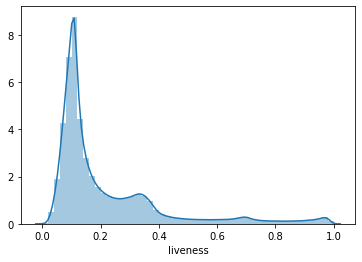

In [38]:
sns.distplot(track['liveness'])

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


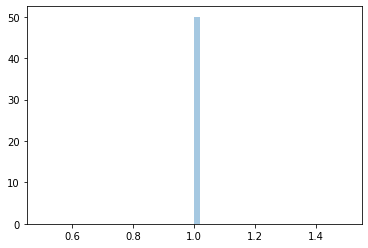

In [39]:
df = np.where((session['not_skipped'] == 'False'),0,1)
sns.distplot(df) 